### Structural Breaks

In [1]:
import numpy as np
import pandas as pd
import yfinance as yf

from FinancialMachineLearning.regime_change.supremum_adf import *
from FinancialMachineLearning.regime_change.cusum_test import *
from FinancialMachineLearning.regime_change.chow_type import *

In [2]:
start_date = '2000-01-01'
end_date = '2024-02-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
...,...,...,...,...,...,...
2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000
2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000
2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000


#### CUSUM Test

<Axes: xlabel='Date'>

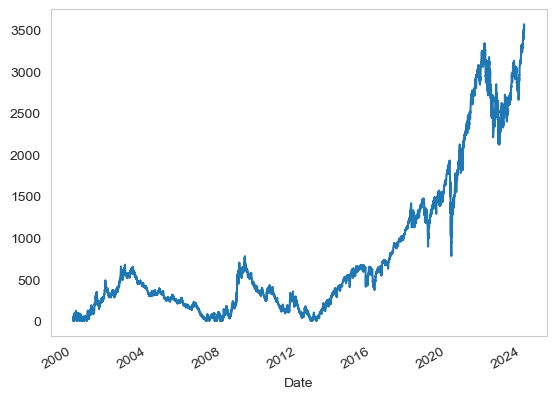

In [3]:
get_values_diff(
    test_type = 'two_sided',
    series = data['Close'],
    index = data.index,
    ind = data.index[0]
).plot(grid = False)

<Axes: xlabel='Date'>

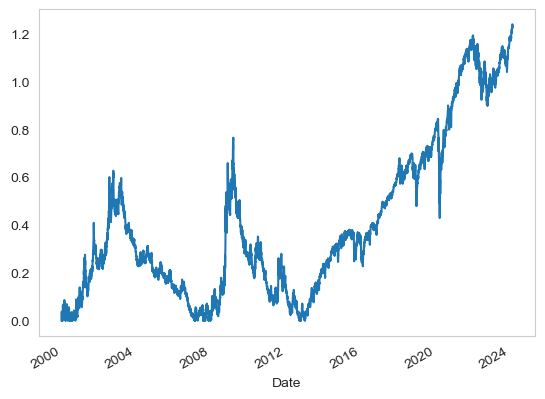

In [4]:
get_values_diff(
    test_type = 'two_sided',
    series = np.log(data['Close']),
    index = data.index,
    ind = data.index[0]
).plot(grid = False)

In [5]:
chu_stinchcombe = get_chu_stinchcombe_white_statistics(
    series = np.log(data['Close']), 
    test_type = 'two_sided',
    num_threads = 8
)

2024-02-14 12:43:24.134455 100.0% get_s_n_for_t done after 1.07 minutes. Remaining 0.0 minutes.


<Axes: title={'center': 'Chu-Stinchcombe White Statistics'}, xlabel='Date'>

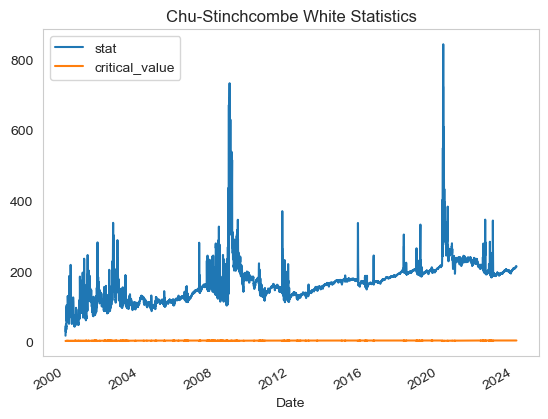

In [6]:
import matplotlib.pyplot as plt

chu_stinchcombe.plot(grid = False, title = 'Chu-Stinchcombe White Statistics')

In [9]:
chu_stinchcombe = get_chu_stinchcombe_white_statistics(
    series = data['Close'], 
    test_type = 'one_sided',
    num_threads = 8
)

024-02-14 12:46:12.594043 62.5% get_s_n_for_t done after 0.63 minutes. Remaining 0.38 minutes.2024-02-14 12:46:27.889889 87.5% get_s_n_for_t done after 0.88 minutes. Remaining 0.13 minutes.


<Axes: title={'center': 'Chu-Stinchcombe White Statistics'}, xlabel='Date'>

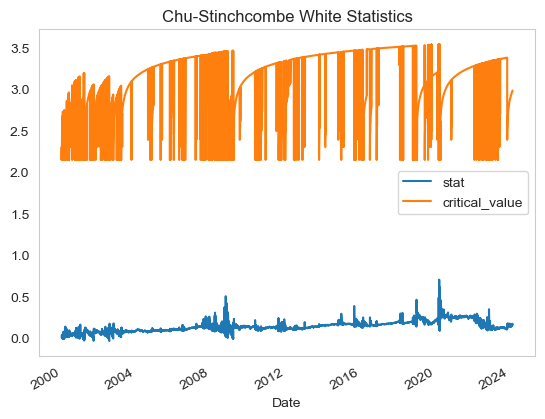

In [10]:
chu_stinchcombe.plot(grid = False, title = 'Chu-Stinchcombe White Statistics')

In [11]:
chu_stinchcombe

,stat,critical_value
Date,,
2000-01-05,0.000862,2.144761
2000-01-06,0.001825,2.300684
2000-01-07,0.024968,2.144761
2000-01-10,0.031721,2.300684
2000-01-11,0.019525,2.387177
...,...,...
2024-02-07,0.164876,2.972222
2024-02-08,0.164252,2.974642
2024-02-09,0.168399,2.977025


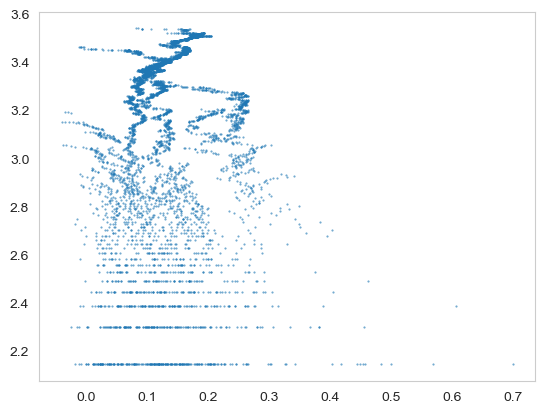

In [13]:
plt.scatter(
    chu_stinchcombe['stat'], 
    chu_stinchcombe['critical_value'], 
    label = 'Chu-Stinchcombe White Statistics',
    alpha = 0.7,
    marker = '.',
    s = 1
)
plt.grid(False)

#### Explosiveness Test

In [22]:
start_date = '1920-01-01'
end_date = '2024-02-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-02-07,4973.049805,4999.890137,4969.049805,4995.060059,4995.060059,4895590000
2024-02-08,4995.160156,5000.399902,4987.089844,4997.910156,4997.910156,4341860000
2024-02-09,5004.169922,5030.060059,5000.339844,5026.609863,5026.609863,3912990000


In [40]:
chow = chow_type_stat(
    series = data['Close']['1980' : '1990'], 
    min_length = 20, 
    num_threads = 8
)

2024-02-14 12:57:03.473830 100.0% chow_type_adf done after 0.03 minutes. Remaining 0.0 minutes.


<Axes: title={'center': 'Chow Type Dickey Fuller Statistics'}, xlabel='Date'>

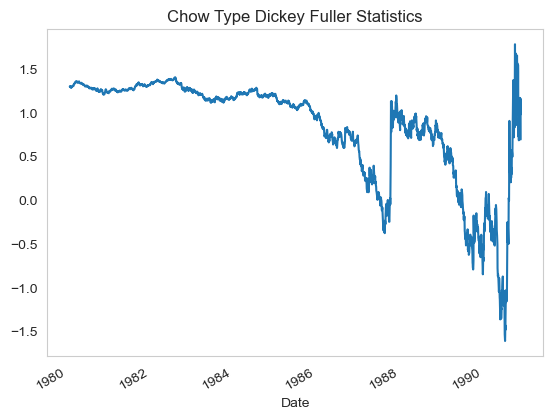

In [41]:
chow.plot(grid = False, title = 'Chow Type Dickey Fuller Statistics')

#### Supremum ADF Test

In [8]:
sadf = get_sadf(
    series = np.log(data['Close']), 
    model = 'linear', 
    lags = 3, 
    min_length = 100, 
    add_const = True,
    num_threads = 8
)

2024-01-29 18:52:23.244272 100.0% sadf_outer_loop done after 76.95 minutes. Remaining 0.0 minutes..


<Axes: title={'center': 'Supremum Augmented Dickey Fuller Statistics'}, xlabel='Date'>

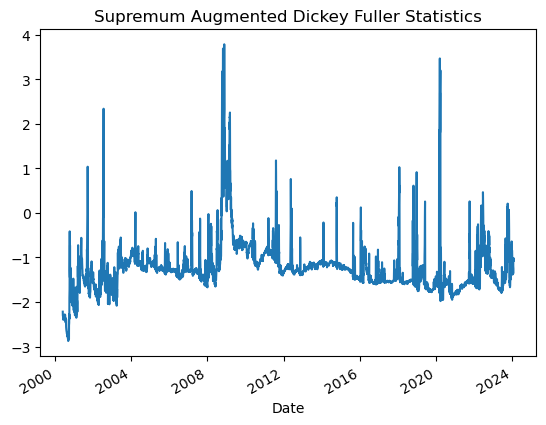

In [11]:
sadf.plot(grid = False, title = 'Supremum Augmented Dickey Fuller Statistics')

Text(0.5, 1.0, 'close prices and SADF statistics')

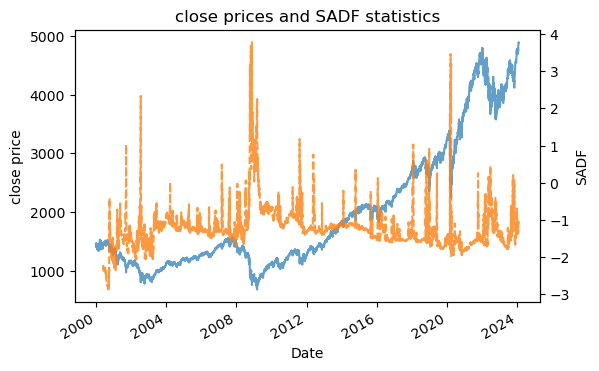

In [18]:
data.Close.plot(figsize = (6, 4), label = 'Original Data', alpha = 0.7)
plt.ylabel('close price')
sadf.plot(grid = False, label = 'SADF statistics', secondary_y = True, ls = '--', alpha = 0.8)
plt.ylabel('SADF')
plt.title('close prices and SADF statistics')

In [ ]:
def super_martingale_test()